<a href="https://colab.research.google.com/github/RishikaVerma21/Play-Store-Review-Analysis/blob/main/Play_store_analysis_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction :**



During the course of time with the increasing awareness of the people with regard to Google Play Store, it has become certain that now a days it has become the one stop platform for the people to download apps of various categories. Google Play Store dispenses millions of apps to people across the globe and hence can aptly be said as the hub of apps for Android devices. Advancement in Information Technology and increasing awareness of people with regard to digitalization have made the Google Play Store the most solicited digital store. In our project a comprehensive analysis of Play Store App has been done by taking into account and subsequently comparing thousands of apps and reviews across different categories. The fetched data will help in formulating strategies for the growth and retention

 **Play store data:**

*This contains data on the Google Play applications. It has 10,841 rows and 13 columns of data which has following columns:*

**App:** The name of apps given

**App Category:** This column tells us the category of the app. This could be beauty, business, medical,art and design entertainment, education...etc.

**Rating:** This column tells us how much rating that app has got. Users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Reviews:** This column tells us the number of user given reviews for each app.

**Size:** This column tells us memory size needed to install the application.

**Installs:** This column tells us the number of times each application has been installed by the users.

**Type:** This column tells us whether the app is free or a paid app.

**Price:** This column tells us the price of the app.

**Content Rating:** This column tells us the audience for the app. They may be for teens, mature audience, etc

**Genres:** This column intends sub-category for each app. 

**Last Updated:** This column tells us the release date of the  app.

**Current Ver:** This column tells us the current version of app.

**Android Ver:** This column tells us the oldest version of Android O/S supported by the app.

**User Reviews :**

*This file contains the result of the sentiment analysis. This data contains 64,295 rows and 5 columns. What these columns says are given below*

**App:** Name of the app.

**Translated_Review:** This column tells us either the original review in english, or a translated version if the orignal review is in another language.

**Sentiment:** This column tells us the result of the sentiment analysis conducted on a review and the value may be either Positive or Neutral or Negative.

**Sentiment_Polarity:** This column tells us the value indicating the positivity or negativity of the sentiment. The values ranges from -1 (most negative) to 1 (most positive). The sentiment polarity of an element defines the orientation of the expressed sentiment, i.e. it tells us whether the text expresses positive, negative or neutral sentiment of the user about the entity in consideration.

**Sentiment_Subjectivity:** This column tells us the value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information while the higher values indicate the review is based on personal or public opinions or judgements.

In [176]:
# Import the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import colorsys
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [177]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import rcParams     


import seaborn as sns              # To make plots with seaborn
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

**Now we will import csv file**

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
path  = "/content/drive/MyDrive/Capstone Projects/Project 1 : Play Store review analysis/"
 
play_store_df = pd.read_csv(path + "Play Store Data.csv")
user_review_df = pd.read_csv(path + "User Reviews.csv")

In [180]:
# This gives us the information of our data set
play_store_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [181]:
# This code will give first 5 rows of the data set
play_store_df.sample(5) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8143,Breweries (CZ/SK),LIFESTYLE,4.4,1740,4.4M,"50,000+",Free,0,Teen,Lifestyle,"July 27, 2017",3.1.0,4.1 and up
10279,Underdog FC,SPORTS,4.6,216,40M,"10,000+",Free,0,Everyone,Sports,"August 2, 2018",23.17,4.1 and up
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up
4206,H-Kakashi - theme Xperia™,PERSONALIZATION,4.6,621,5.4M,"50,000+",Free,0,Everyone,Personalization,"December 1, 2017",a.2,4.4 and up
5039,AF Hydro,HEALTH_AND_FITNESS,2.0,136,15M,"10,000+",Free,0,Everyone,Health & Fitness,"May 12, 2018",1.0.5,4.4 and up


**Let's Check the shape of data**

In [182]:
print(play_store_df.shape)
print(user_review_df.shape)

(10841, 13)
(64295, 5)


#DATA CLEANING

In data cleaning process we will remove unnecessary, corrupted, incorrectly formatted and duplicate data from our existing Data

In [183]:
# First we need to find missing value in our data
print('Missing value are as follows:')

play_store_df.isnull().sum()

Missing value are as follows:


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Drop NaNs and duplicates from existing dataframe**

In [184]:
# Delete duplicates from App column.
play_store_df.drop_duplicates(subset=['App'],keep='first', inplace=True, ignore_index=True)

# check data remove or not
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [185]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [186]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [187]:
# This code will give first 10 rows of the data set
play_store_df.sample(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
719,"Movies by Flixster, with Rotten Tomatoes",ENTERTAINMENT,4.5,653008,16M,"10,000,000+",Free,0,Everyone,Entertainment,"June 20, 2018",9.1.4,4.4 and up
5968,"3D Color by Number: Voxel, Unicorn, Pixel Art 3D",FAMILY,4.3,2017,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"February 16, 2018",2.4,4.1 and up
7983,IRIS : Customer Service - DZ Algeria,TRAVEL_AND_LOCAL,4.7,57,7.0M,"1,000+",Free,0,Everyone,Travel & Local,"March 10, 2018",2018-03,4.0 and up
3882,Last Empire - War Z: Strategy,FAMILY,4.2,853495,78M,"50,000,000+",Free,0,Teen,Strategy,"August 2, 2018",1.0.208,4.0.3 and up
5661,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
1192,Yes319 real price login query,HOUSE_AND_HOME,NaN,12,5.1M,"5,000+",Free,0,Everyone,House & Home,"July 12, 2018",1.04,4.0.3 and up
7552,MyLifeOrganized: To-Do List,PRODUCTIVITY,4.3,4441,Varies with device,"100,000+",Free,0,Everyone,Productivity,"June 18, 2018",Varies with device,Varies with device
4823,Q7 SmartWatch,HEALTH_AND_FITNESS,3.0,94,30M,"10,000+",Free,0,Everyone,Health & Fitness,"July 9, 2018",1.0.2,4.3 and up
7557,Do Not Crash,FAMILY,3.7,56664,8.3M,"1,000,000+",Free,0,Everyone,Casual,"February 5, 2015",1.4,2.3 and up
1665,Supermarket – Game for Kids,FAMILY,4.4,112080,26M,"10,000,000+",Free,0,Everyone,Casual;Pretend Play,"July 26, 2018",1.24,4.1 and up


#CORRECTING DATA TYPE

In this process we are correcting the data types that are not correct in our file.

In [188]:
# Here we will replace null values with median in the rating column.
median_val =round(play_store_df['Rating'].median(),2)

#median_val
play_store_df['Rating'].fillna(median_val,inplace=True)


play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0],inplace=True)
play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0],inplace=True)
play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0],inplace = True)

# Finding the mod values of column and replacing it null values.

mode_val_type = play_store_df['Type'].mode()[0]
mode_val_type

'Free'

In [189]:
play_store_df['Type'].fillna(mode_val_type,inplace=True)

In [190]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [191]:
# Here you can notice the difference

play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


#CHECKING

In this process we will Check outliers

In [192]:
play_store_df[play_store_df.Rating<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [193]:
play_store_df[play_store_df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [194]:
# Here we will drop record rating >5
play_store_df.drop([9300],inplace=True)  

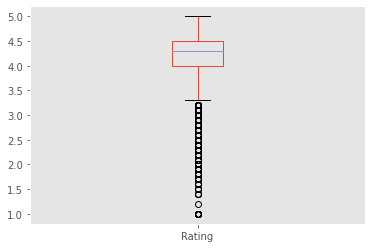

In [ ]:
play_store_df.boxplot(column='Rating')
plt.grid(False)

Here it is  showing there is no rating present below 1 and above 5

**CLEANING THE DATA MORE PRECISELY**

In [195]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [196]:
play_store_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Clean data more precisely

In [197]:
# Here we will remove '+' and ',' in Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)  #drop  Free from Installs column

play_store_df['Installs']=play_store_df['Installs'].apply(lambda x: int(x)) # convert to int

# Here we will remove '$' from price column and convert into float type

play_store_df['Price']=play_store_df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df['Price']=play_store_df['Price'].apply(lambda x: float(x))

play_store_df = play_store_df[~(play_store_df['Price'] == "Everyone")].reset_index(drop=True)  #drop 'Everyone from Price column

In [198]:
play_store_df = play_store_df[~(play_store_df['Size'] == "Varies with device")].reset_index(drop=True)

In [199]:
play_store_df['Size']=play_store_df['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)

# Here we need to convert kb to Mb formula Mb=kb/1024

play_store_df['Size']=play_store_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)

# Now we will change datatype with respect to their data
play_store_df['Size']=play_store_df['Size'].astype(float)
play_store_df['Reviews']=play_store_df['Reviews'].astype(int)

In [200]:
# play store review should not be more than installs so we need to check data 
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1546,KBA-EZ Health Guide,MEDICAL,5.0,4,25.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
2836,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
3904,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,0.232422,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
3999,Ra Ga Ba,GAME,5.0,2,20.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
4530,Sam.BN Pro,TOOLS,4.3,11,2.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
4692,Brick Breaker BR,GAME,5.0,7,19.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
5337,Trovami se ci riesci,GAME,5.0,11,6.100000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
6415,DN Blog,SOCIAL,5.0,20,4.200000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
6863,DZ Puzzle,FAMILY,4.3,14,47.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up
8300,Mu.F.O.,GAME,5.0,2,16.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [201]:
# Now we remove fake data firstly stored in temporary variable
temp_= play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']].index
play_store_df.drop(labels=temp_,inplace=True)

In [202]:
play_store_df.loc[play_store_df['Reviews']>play_store_df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Missing value procedure done

In [203]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [204]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8422 entries, 0 to 8431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8422 non-null   object 
 1   Category        8422 non-null   object 
 2   Rating          8422 non-null   float64
 3   Reviews         8422 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        8422 non-null   int64  
 6   Type            8422 non-null   object 
 7   Price           8422 non-null   float64
 8   Content Rating  8422 non-null   object 
 9   Genres          8422 non-null   object 
 10  Last Updated    8422 non-null   object 
 11  Current Ver     8422 non-null   object 
 12  Android Ver     8422 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 921.2+ KB


## **DATA EXPLORATION AND VISUALISATION**

Top five category getting Higest average Rating

In [205]:
play_store_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EVENTS             4.419298
EDUCATION          4.373034
ART_AND_DESIGN     4.358065
PARENTING          4.338889
PERSONALIZATION    4.320000
Name: Rating, dtype: float64

Total number of free and paid apps

In [206]:
play_store_df['Type'].value_counts()

Free    7742
Paid     680
Name: Type, dtype: int64

Top 5 Apps having highest reviews

In [207]:
index1=play_store_df['Reviews'].sort_values(ascending=False).head().index

play_store_df.iloc[index1]['App']

1057                                 Clash of Clans
1042                                 Subway Surfers
1047                                   Clash Royale
1043                               Candy Crush Saga
260     UC Browser - Fast Download Private & Secure
Name: App, dtype: object

In [208]:
play_store_df["Price"]=play_store_df["Price"].replace({"$": " "})

In [209]:
play_store_df[play_store_df['Price']>=250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2541,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
2666,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2670,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
3520,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
3522,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
3523,I am rich VIP,LIFESTYLE,3.8,411,2.600000,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
3524,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
3525,I am extremely Rich,LIFESTYLE,2.9,41,2.900000,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
3526,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
3527,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [210]:
High_paid_apps = play_store_df[play_store_df['Price']>=250]
High_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2541,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
2666,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2670,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
3520,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
3522,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
3523,I am rich VIP,LIFESTYLE,3.8,411,2.600000,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
3524,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
3525,I am extremely Rich,LIFESTYLE,2.9,41,2.900000,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
3526,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
3527,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [211]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8422 entries, 0 to 8431
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8422 non-null   object 
 1   Category        8422 non-null   object 
 2   Rating          8422 non-null   float64
 3   Reviews         8422 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        8422 non-null   int64  
 6   Type            8422 non-null   object 
 7   Price           8422 non-null   float64
 8   Content Rating  8422 non-null   object 
 9   Genres          8422 non-null   object 
 10  Last Updated    8422 non-null   object 
 11  Current Ver     8422 non-null   object 
 12  Android Ver     8422 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 921.2+ KB


In [212]:
High_paid_apps["Installs"].groupby(High_paid_apps["App"]).sum()

App
Eu Sou Rico                               0
I AM RICH PRO PLUS                     1000
I Am Rich                             10000
I Am Rich Premium                     50000
I Am Rich Pro                          5000
I am Rich                              5000
I am Rich Plus                        10000
I am Rich!                             1000
I am extremely Rich                    1000
I am rich                            100000
I am rich (Most expensive app)         1000
I am rich VIP                         10000
I am rich(premium)                     5000
I'm Rich - Trump Edition              10000
I'm Rich/Eu sou Rico/أنا غني/我很有錢         0
most expensive app (H)                  100
💎 I'm rich                            10000
Name: Installs, dtype: int64

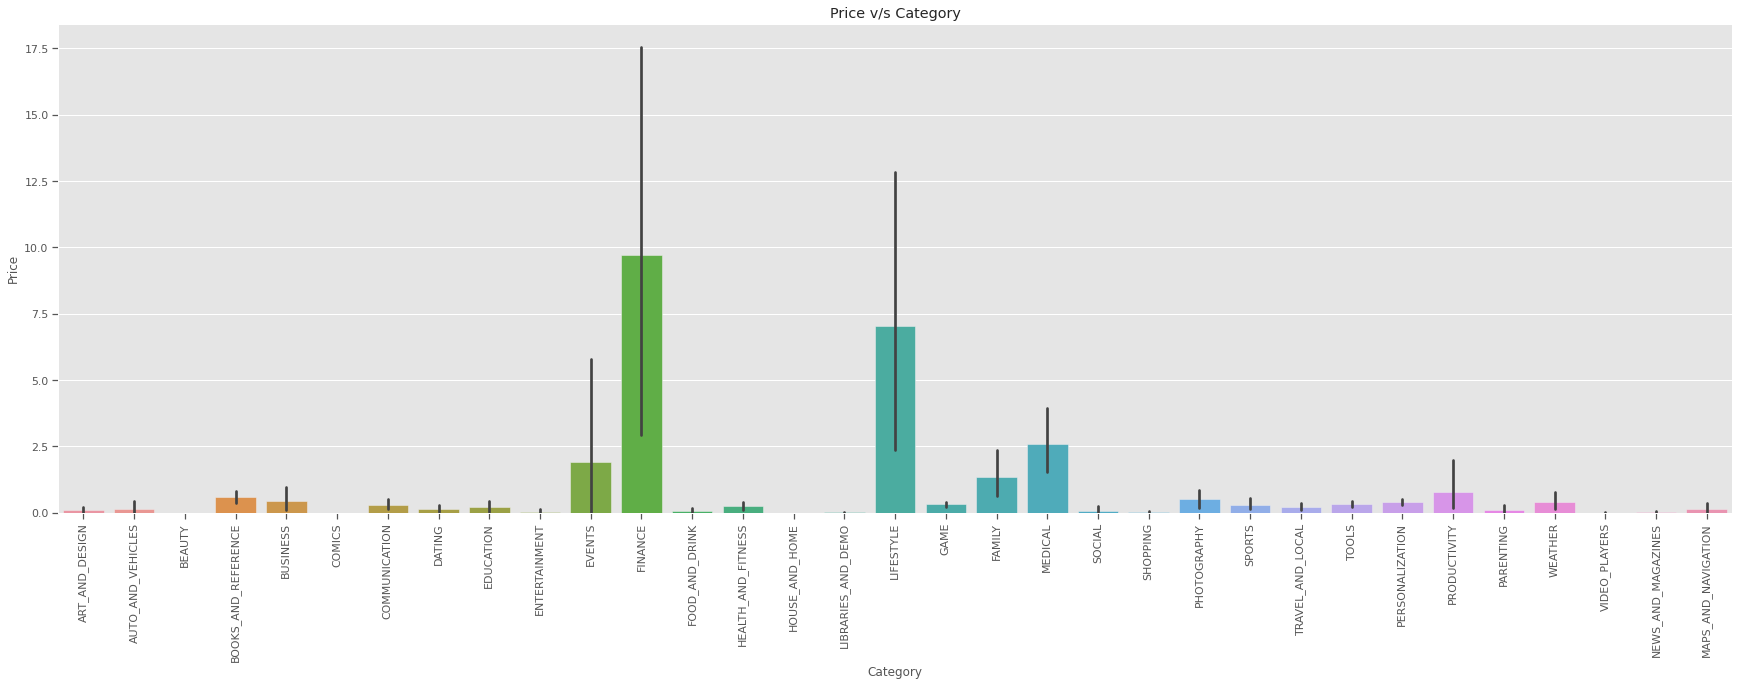

<Figure size 2160x576 with 0 Axes>

In [214]:
sns.barplot(x="Category", y="Price",data=play_store_df)

plt.title('Price v/s Category')
plt.xticks(rotation=90)
plt.figure(figsize=(30,8))
rcParams['figure.figsize'] = 30,9

# Categorywise count of app

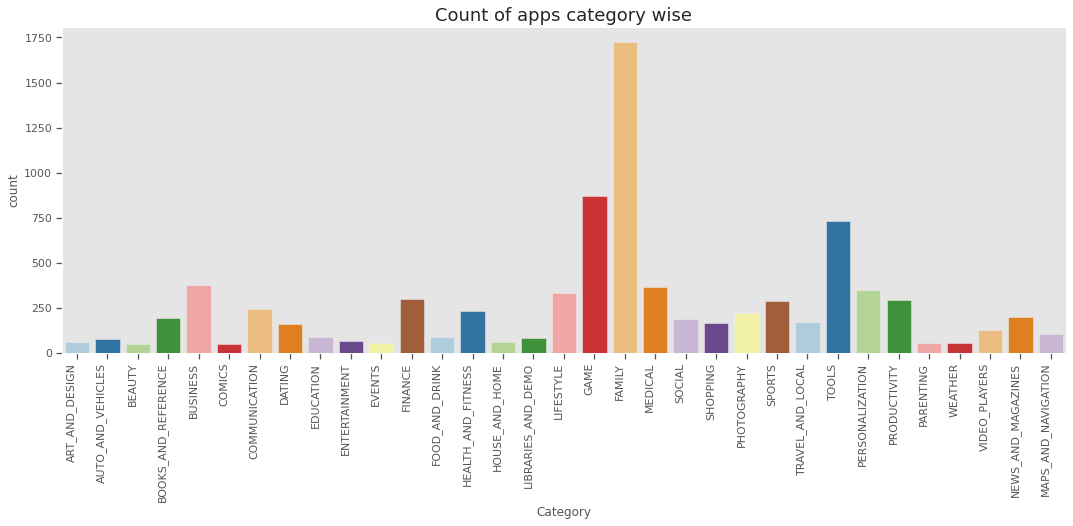

In [215]:
plt.figure(figsize=(18,6))

ax = sns.countplot(x="Category",data=play_store_df,palette="Paired")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.title('Count of apps category wise',size = 18)
ax.grid(False)
sns.set_style('white')

# Rating of apps

average rating for app is 4.18321


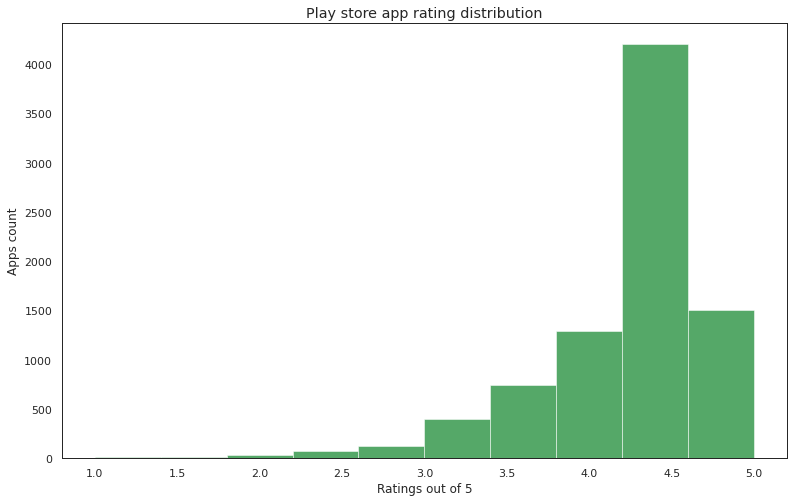

In [216]:
#plot histogram from rating column
plt.figure(figsize=(13,8))
print(f"average rating for app is {round(play_store_df['Rating'].mean(),5)}")

play_store_df['Rating'].hist(color='g')
plt.title('Play store app rating distribution')
plt.ylabel('Apps count')
plt.xlabel('Ratings out of 5')
plt.grid(False)
plt.show()

# Size of apps

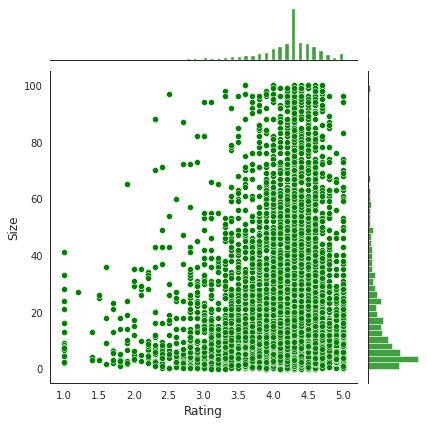

In [ ]:
sns.jointplot(x = "Rating", y = "Size", kind = "scatter",color='g', data = play_store_df)

plt.ylabel('Size in MB --->')
plt.xlabel('Rating ----->')
plt.show()

# Price category

Text(0, 0.5, '')

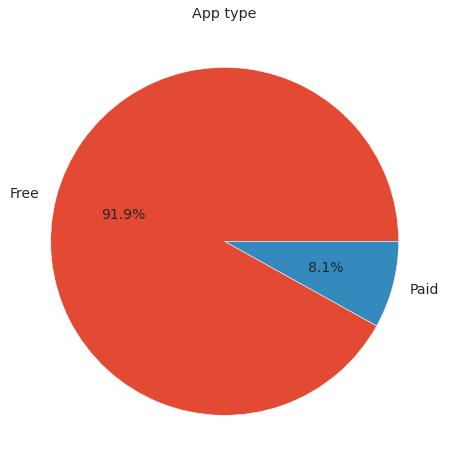

In [217]:
play_store_df['Type'].value_counts().plot.pie(figsize=(12,8),autopct='%1.1f%%',textprops= {'fontsize': 14},subplots=True)
plt.title('App type')
plt.ylabel('')

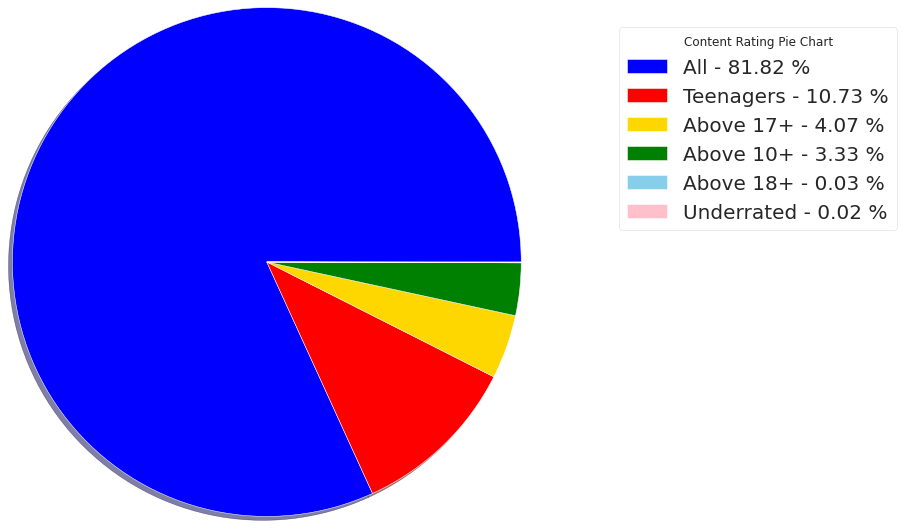

In [218]:
# We will Plot the pie chart for Content rating & showing their percentages 
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['All','Teenagers','Above 17+','Above 10+','Above 18+','Underrated'])
y = np.array([7903, 1036,393,322, 3, 2])
colors = ['blue', 'red', 'gold','green' ,'skyblue', 'pink']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors,shadow=True, startangle=360, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels,title='Content Rating Pie Chart', loc='right center', bbox_to_anchor=(1.2, 1.), fontsize=20)
plt.savefig('piechart.png', bbox_inches='tight')

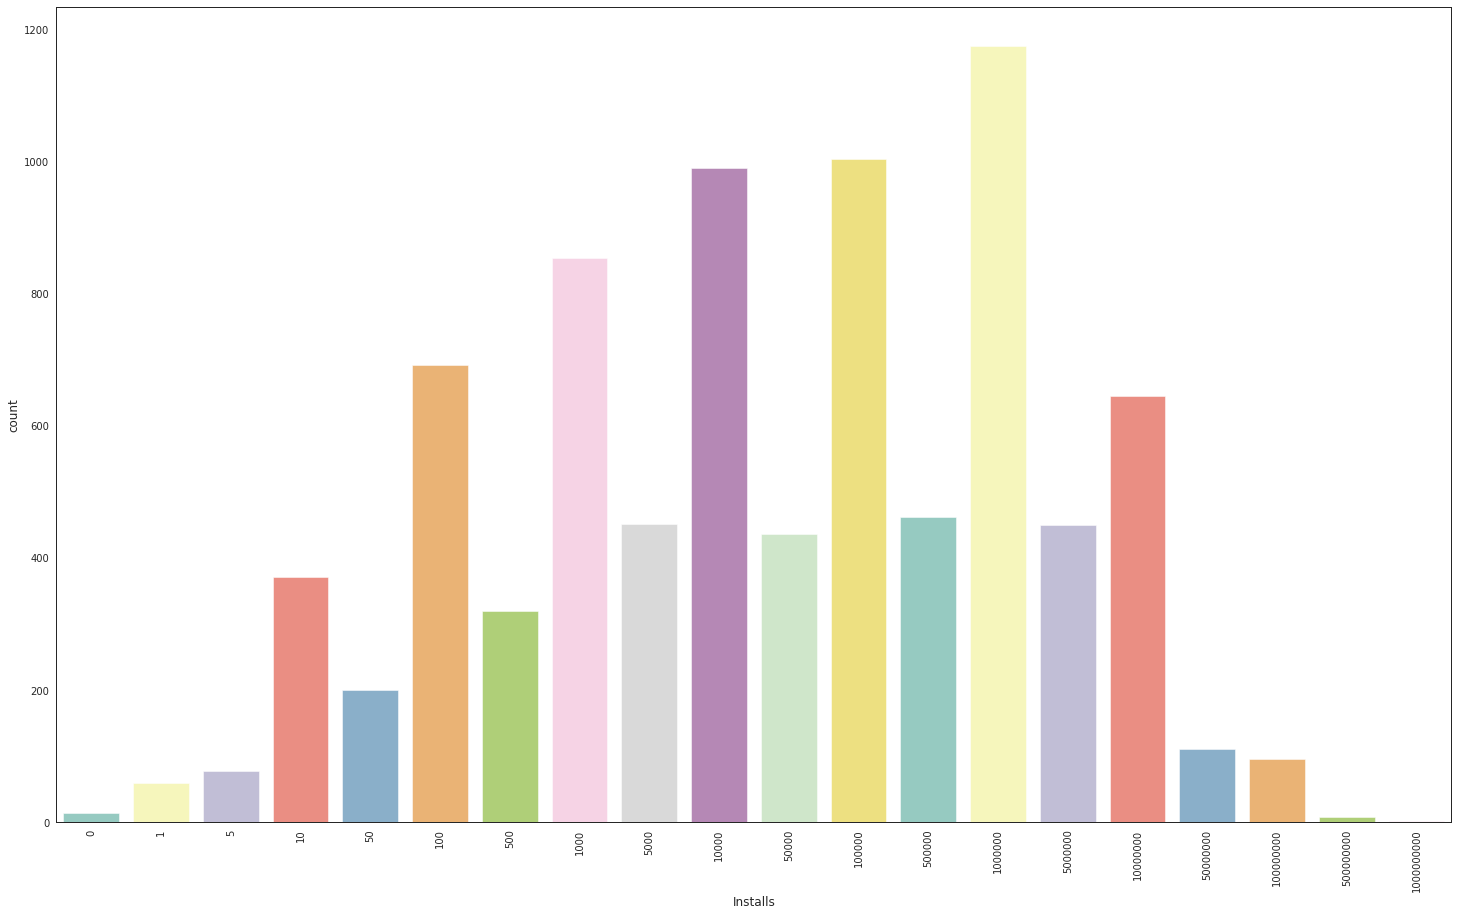

In [ ]:
plt.subplots(figsize=(25,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=play_store_df, palette="Set3")

In [219]:
corr=play_store_df.corr()
corr

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061514,0.045843,0.040699,-0.018685
Reviews,0.061514,1.000000,0.179408,0.597280,-0.008654
Size,0.045843,0.179408,1.000000,0.134357,-0.022447
Installs,0.040699,0.597280,0.134357,1.000000,-0.010155
Price,-0.018685,-0.008654,-0.022447,-0.010155,1.000000


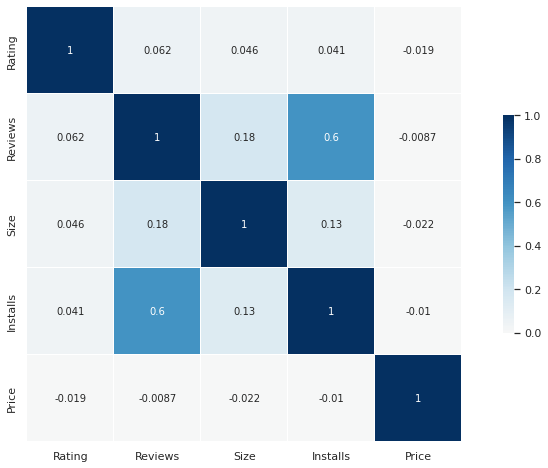

In [220]:
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.heatmap(corr,vmin=0, vmax=1, center=0, cmap="RdBu",annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_size_inches(15, 8)

#**SENTIMENT ANALYSIS OF USER REVIEW**

Now we do sentiment analysis on user review. User review data analysis can be done by identify customers mood i.e. positive, negative or neutral


In [221]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [222]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [223]:
import pandas as pd

duplicate_apps = pd.read_csv('..//content/drive/MyDrive/Capstone Projects/Project 1 : Play Store review analysis/User Reviews.csv')

# Drop duplicate apps
apps = duplicate_apps.drop_duplicates()

# Total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)


Total number of apps in the dataset =  30679


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
34911,DisneyNOW – TV Shows & Games,"My kid loves watching favorite shows, I havent...",Positive,0.089286,0.518452
26322,Choices: Stories You Play,I addicted game. It sucks spend lot money make...,Negative,-0.157143,0.302381
17889,British Airways,Has buttons telling flights available eg NY £X...,Positive,0.125000,0.250000
19722,"CBS Sports App - Scores, News, Stats & Watch Live",Don't like hockey games mixed baseball games. ...,Positive,0.165000,0.520000
21540,Calorie Counter & Diet Tracker,"The crashes lot phone now, friend newer phone ...",Positive,0.092000,0.308000


In [224]:
sentiment_df=pd.merge(user_review_df,play_store_df[['App','Category','Type','Price']],how='inner',on='App')

#After this drop null value
sentiment_df = sentiment_df.dropna()
sentiment_df.shape

(24069, 8)

In [225]:
sentiment_df['Type'].value_counts()

Free    23653
Paid      416
Name: Type, dtype: int64

Seperate dataframe for free and paid apps

In [226]:
free_apps = sentiment_df[sentiment_df["Type"] == "Free"]
paid_apps = sentiment_df[sentiment_df["Type"] == "Paid"]

Normalized values in percentages

In [227]:
print("Free Apps: Sentiment Percentage \n" + "\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps: Sentiment Percentage \n" +"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps: Sentiment Percentage 

Positive    63.738215
Negative    22.529912
Neutral     13.731873
Name: Sentiment, dtype: float64


Paid Apps: Sentiment Percentage 

Positive    78.125000
Negative    15.144231
Neutral      6.730769
Name: Sentiment, dtype: float64


In [228]:
# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps))

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])

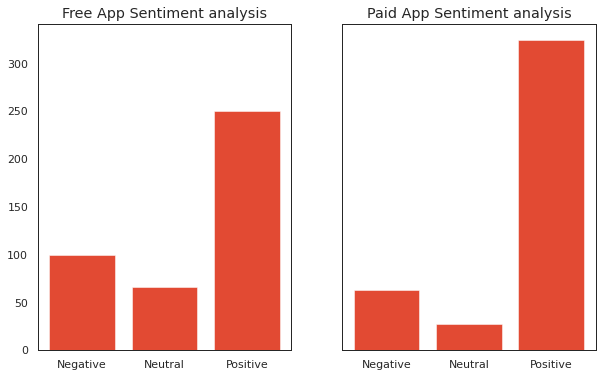

In [229]:
# Generate values & counts for Sentiment columns in our dataframes & put them in dictionaries
val_ct_free = np.unique(free_apps['Sentiment'],return_counts=True)
free_data = {value: count for value, count in zip(val_ct_free[0],val_ct_free[1])}

val_ct_paid = np.unique(paid_apps['Sentiment'],return_counts=True)
paid_data = {value: count for value, count in zip(val_ct_paid[0],val_ct_paid[1])}


# Put values and counts each in a different variable for use in plots, taken from dictionaries
free_names = list(free_data.keys())
free_values = list(free_data.values())
paid_names = list(paid_data.keys())
paid_values = list(paid_data.values())


# Create a figure containing plots for each app type, sharing the y-axis for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharey=True)
axs[0].bar(free_names, free_values)
axs[0].set_title("Free App Sentiment analysis")
axs[1].bar(paid_names, paid_values)
axs[1].set_title("Paid App Sentiment analysis")
plt.show()

Free apps as we can see negative as well as neutral review so high varience. paid app has more positive review very less neutral and negative reviews as comapre to postive reviews

In [251]:
# First we merge the Category & App of 1st data set to App column in 2nd data set
category_df = pd.merge(sentiment_df, play_store_df[["App","Category"]] , how='inner', on="App")

# Drop all nan values
category_df =category_df.dropna()

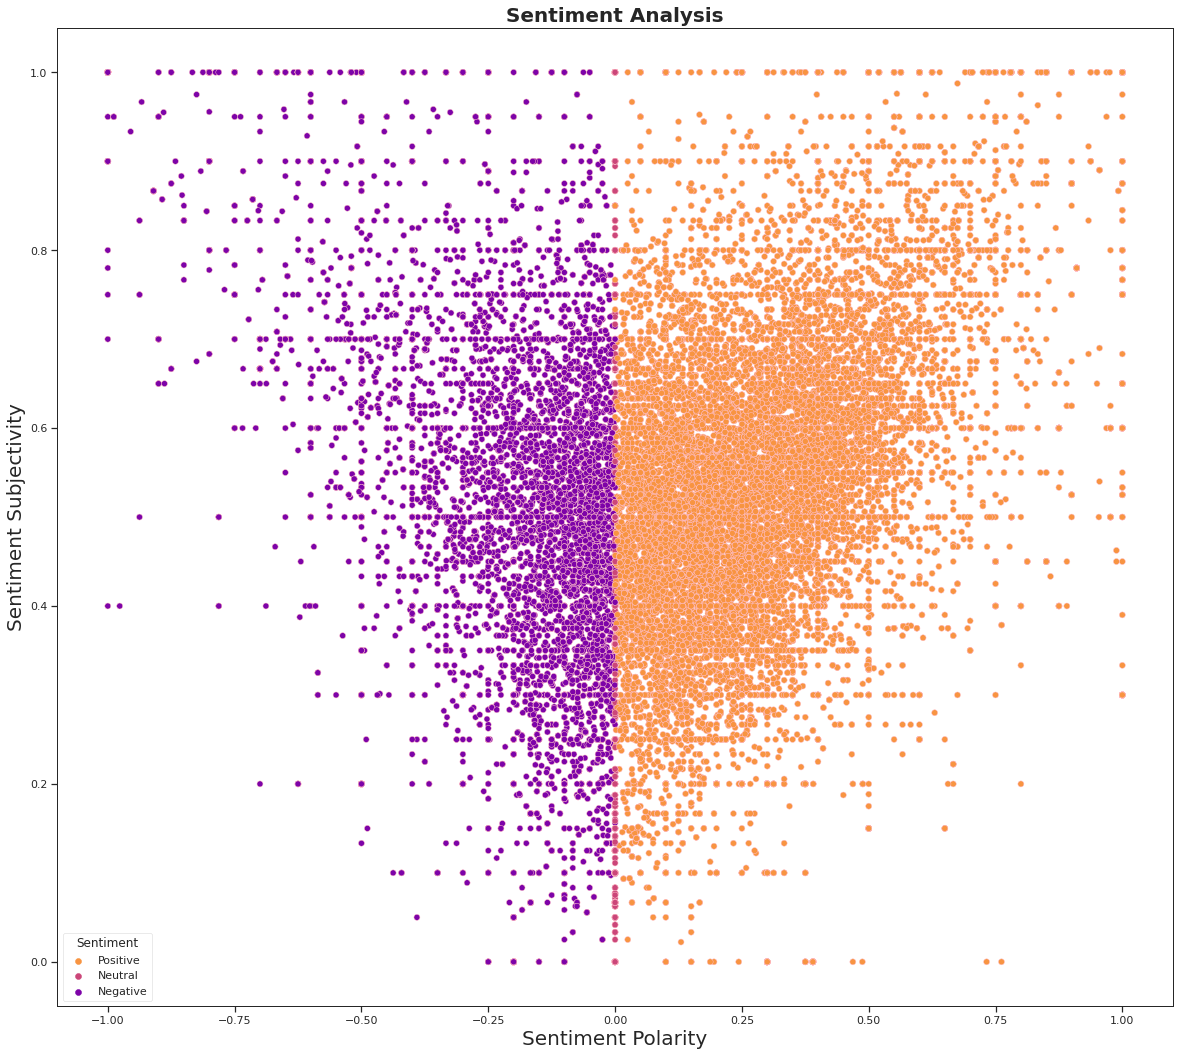

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
j = sns.scatterplot(user_review_df['Sentiment_Polarity'],user_review_df['Sentiment_Subjectivity'],hue=user_review_df['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20, fontweight='bold')
plt.show()

By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

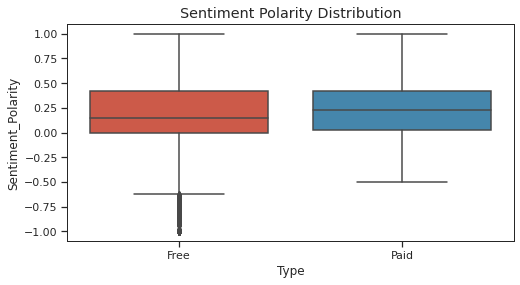

In [237]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# User review sentiment polarity for paid vs free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = sentiment_df)
ax.set_title('Sentiment Polarity Distribution')


# WORDCLOUD plot for positive and negative reviews

In [275]:
# Merge two datasets
merged_df1 = play_store_df.merge(user_review_df, on = "App")
merged_df1.head()

# Drop null values
merged_df1 = merged_df1.dropna(subset=['Translated_Review'])

In [270]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=250, colormap="Set2")
from nltk import sent_tokenize, word_tokenize

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher','please','love','it','the','i',
              'I','my','like','really','every','would','even','though','game','review']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [273]:
# Wordcloud def Function
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 300,  max_font_size = 50, )
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title('Common Phrases in Reviews')

In [276]:
# Frequency of words in translated review column
from collections import Counter
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
import re

top_N = 100

pos_review_lower = merged_df1[merged_df1['Sentiment']=='Positive']['Translated_Review'].str.lower().str.cat(sep=' ')
neg_review_lower = merged_df1[merged_df1['Sentiment']=='Negative']['Translated_Review'].str.lower().str.cat(sep=' ')
neu_review_lower = merged_df1[merged_df1['Sentiment']=='Neutral']['Translated_Review'].str.lower().str.cat(sep=' ')


# Removing Punctuations
pos_review_remove_pun = re.sub('[^A-Za-z]+', ' ', pos_review_lower)
neg_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neg_review_lower)
neu_review_remove_pun = re.sub('[^A-Za-z]+', ' ', neu_review_lower)

In [277]:
#remove all the stopwords from the text
pos_word_tokens_tags = word_tokenize(pos_review_remove_pun)
neg_word_tokens_tags = word_tokenize(neg_review_remove_pun)
neu_word_tokens_tags = word_tokenize(neu_review_remove_pun)
pos_filtered_sentence_tags = [w_tags for w_tags in pos_word_tokens_tags if not w_tags in stop]
pos_filtered_sentence_tags = []
for w_tags in pos_word_tokens_tags:
    if w_tags not in stop:
        pos_filtered_sentence_tags.append(w_tags)

neg_filtered_sentence_tags = [w_tags for w_tags in neg_word_tokens_tags if not w_tags in stop]
neg_filtered_sentence_tags = []
for w_tags in neg_word_tokens_tags:
    if w_tags not in stop:
        neg_filtered_sentence_tags.append(w_tags)
        
neu_filtered_sentence_tags = [w_tags for w_tags in neu_word_tokens_tags if not w_tags in stop]
neu_filtered_sentence_tags = []
for w_tags in neu_word_tokens_tags:
    if w_tags not in stop:
        neu_filtered_sentence_tags.append(w_tags)

In [278]:
# Removing characters which have length less than 2  

pos_without_single_chr_rev = [word_tags for word_tags in pos_filtered_sentence_tags if len(word_tags) > 2]
neg_without_single_chr_rev = [word_tags for word_tags in neg_filtered_sentence_tags if len(word_tags) > 2]
neu_without_single_chr_rev = [word_tags for word_tags in neu_filtered_sentence_tags if len(word_tags) > 2]

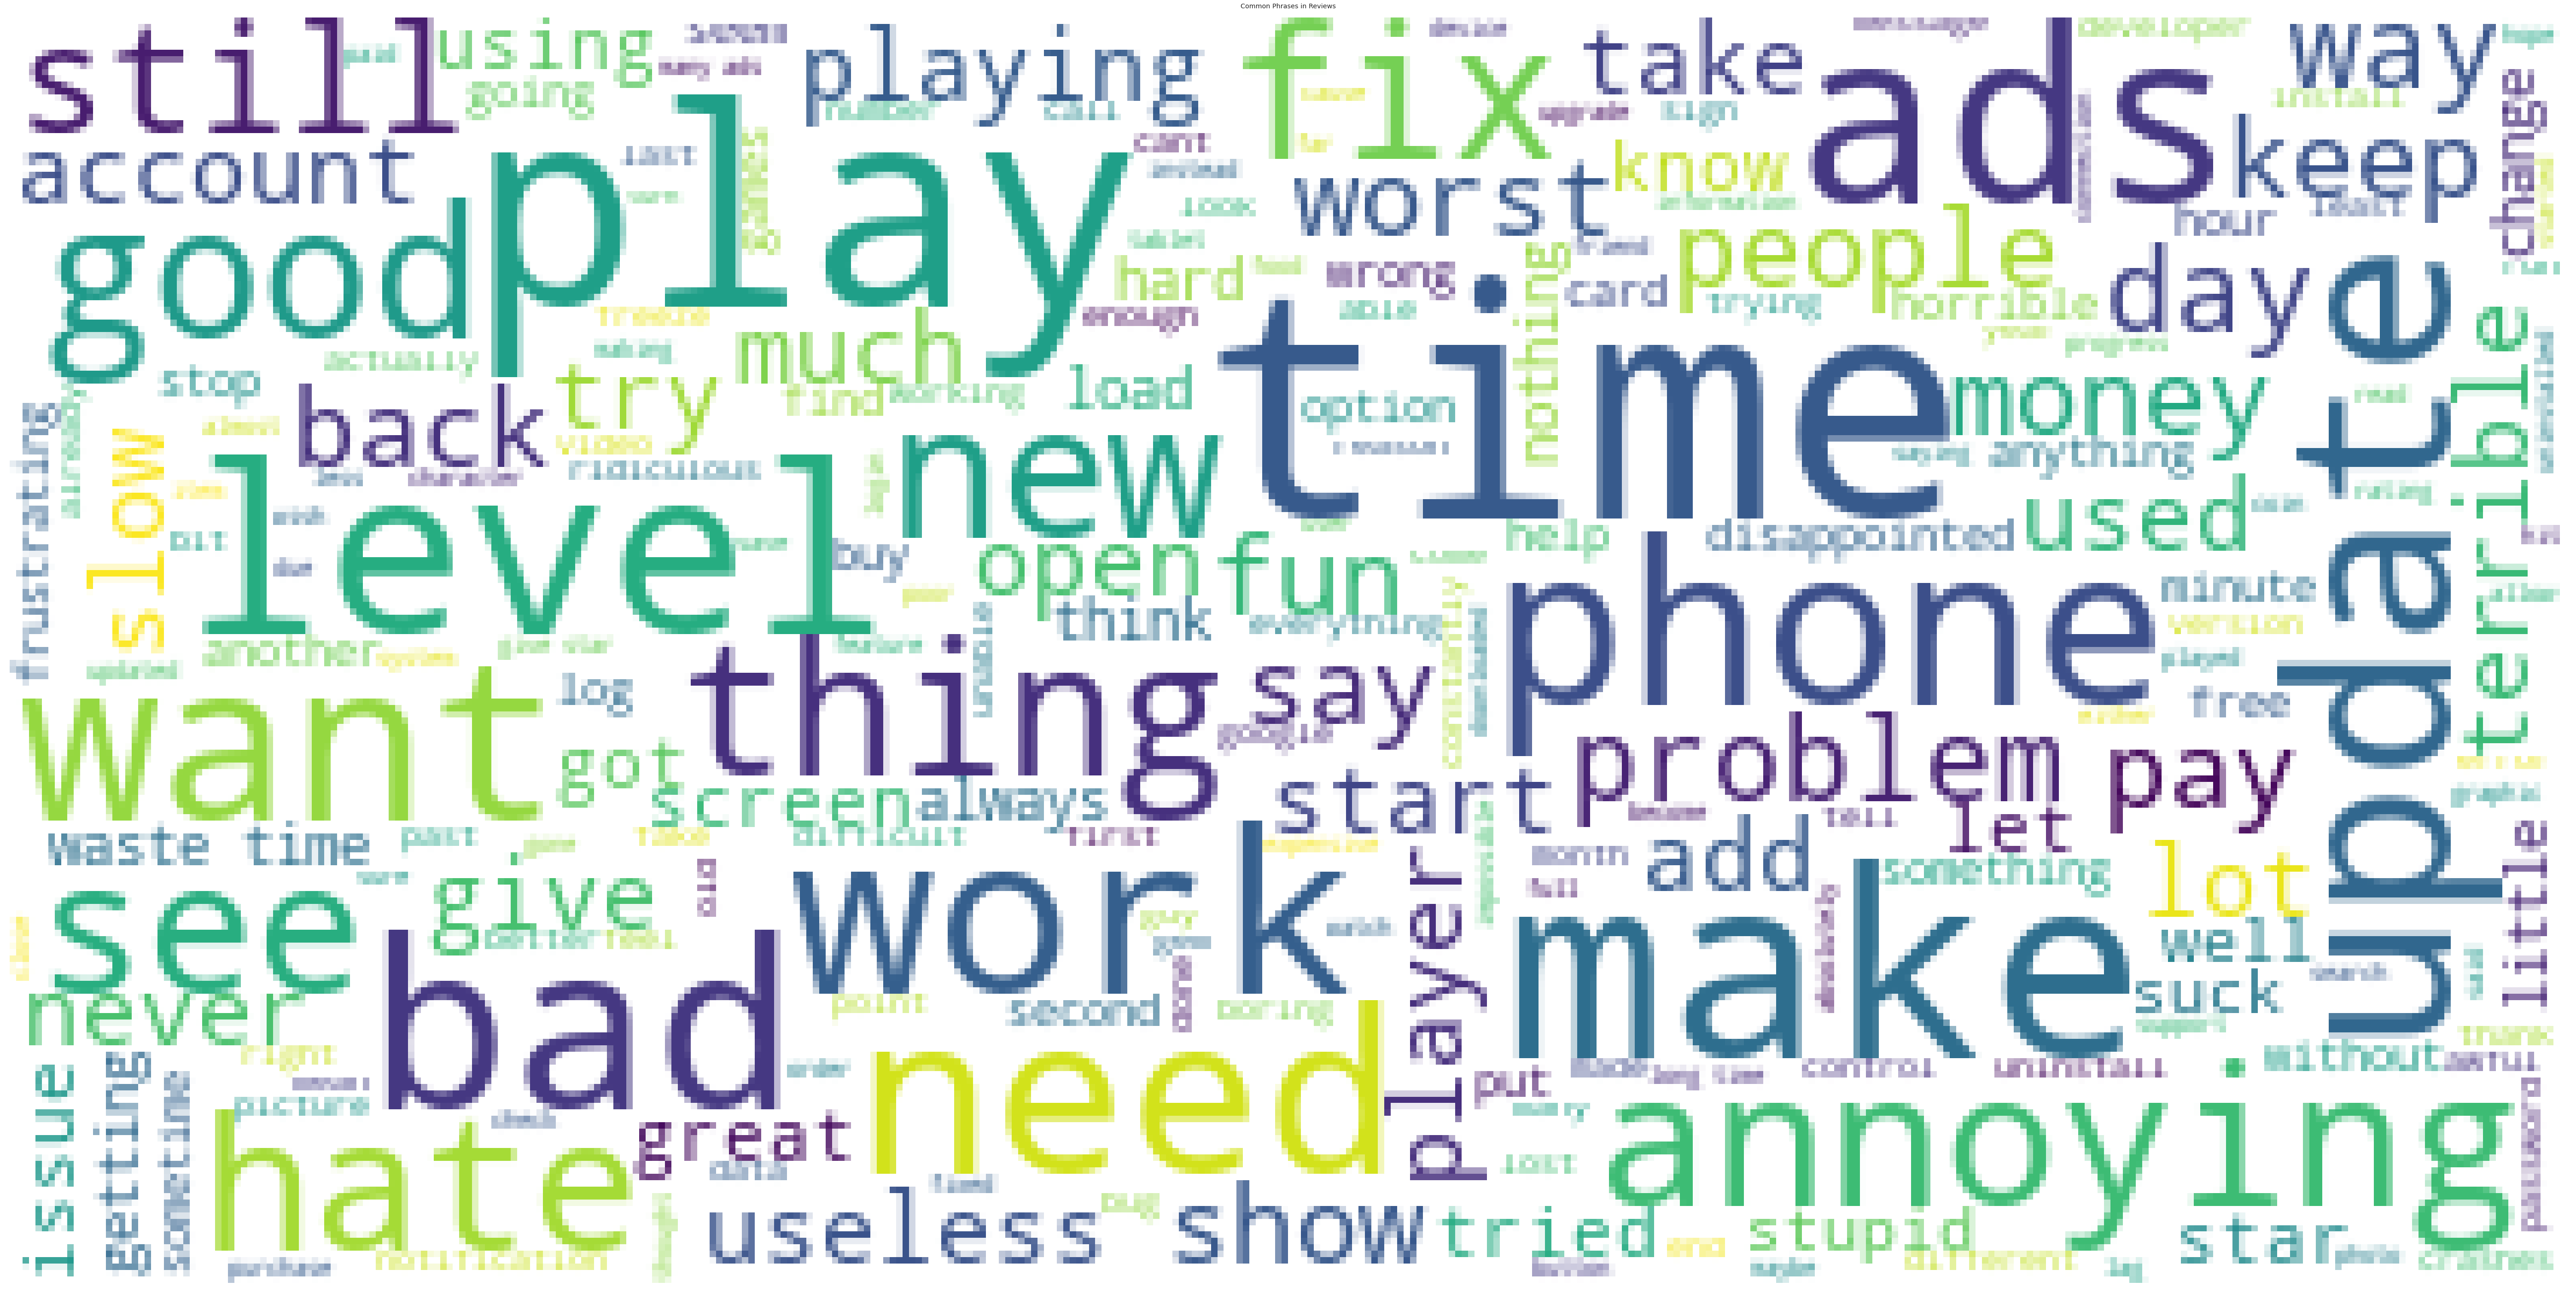

In [280]:
# Wordcloud of Negative Reviews
wc(neg_without_single_chr_rev,'white','Common Words' )

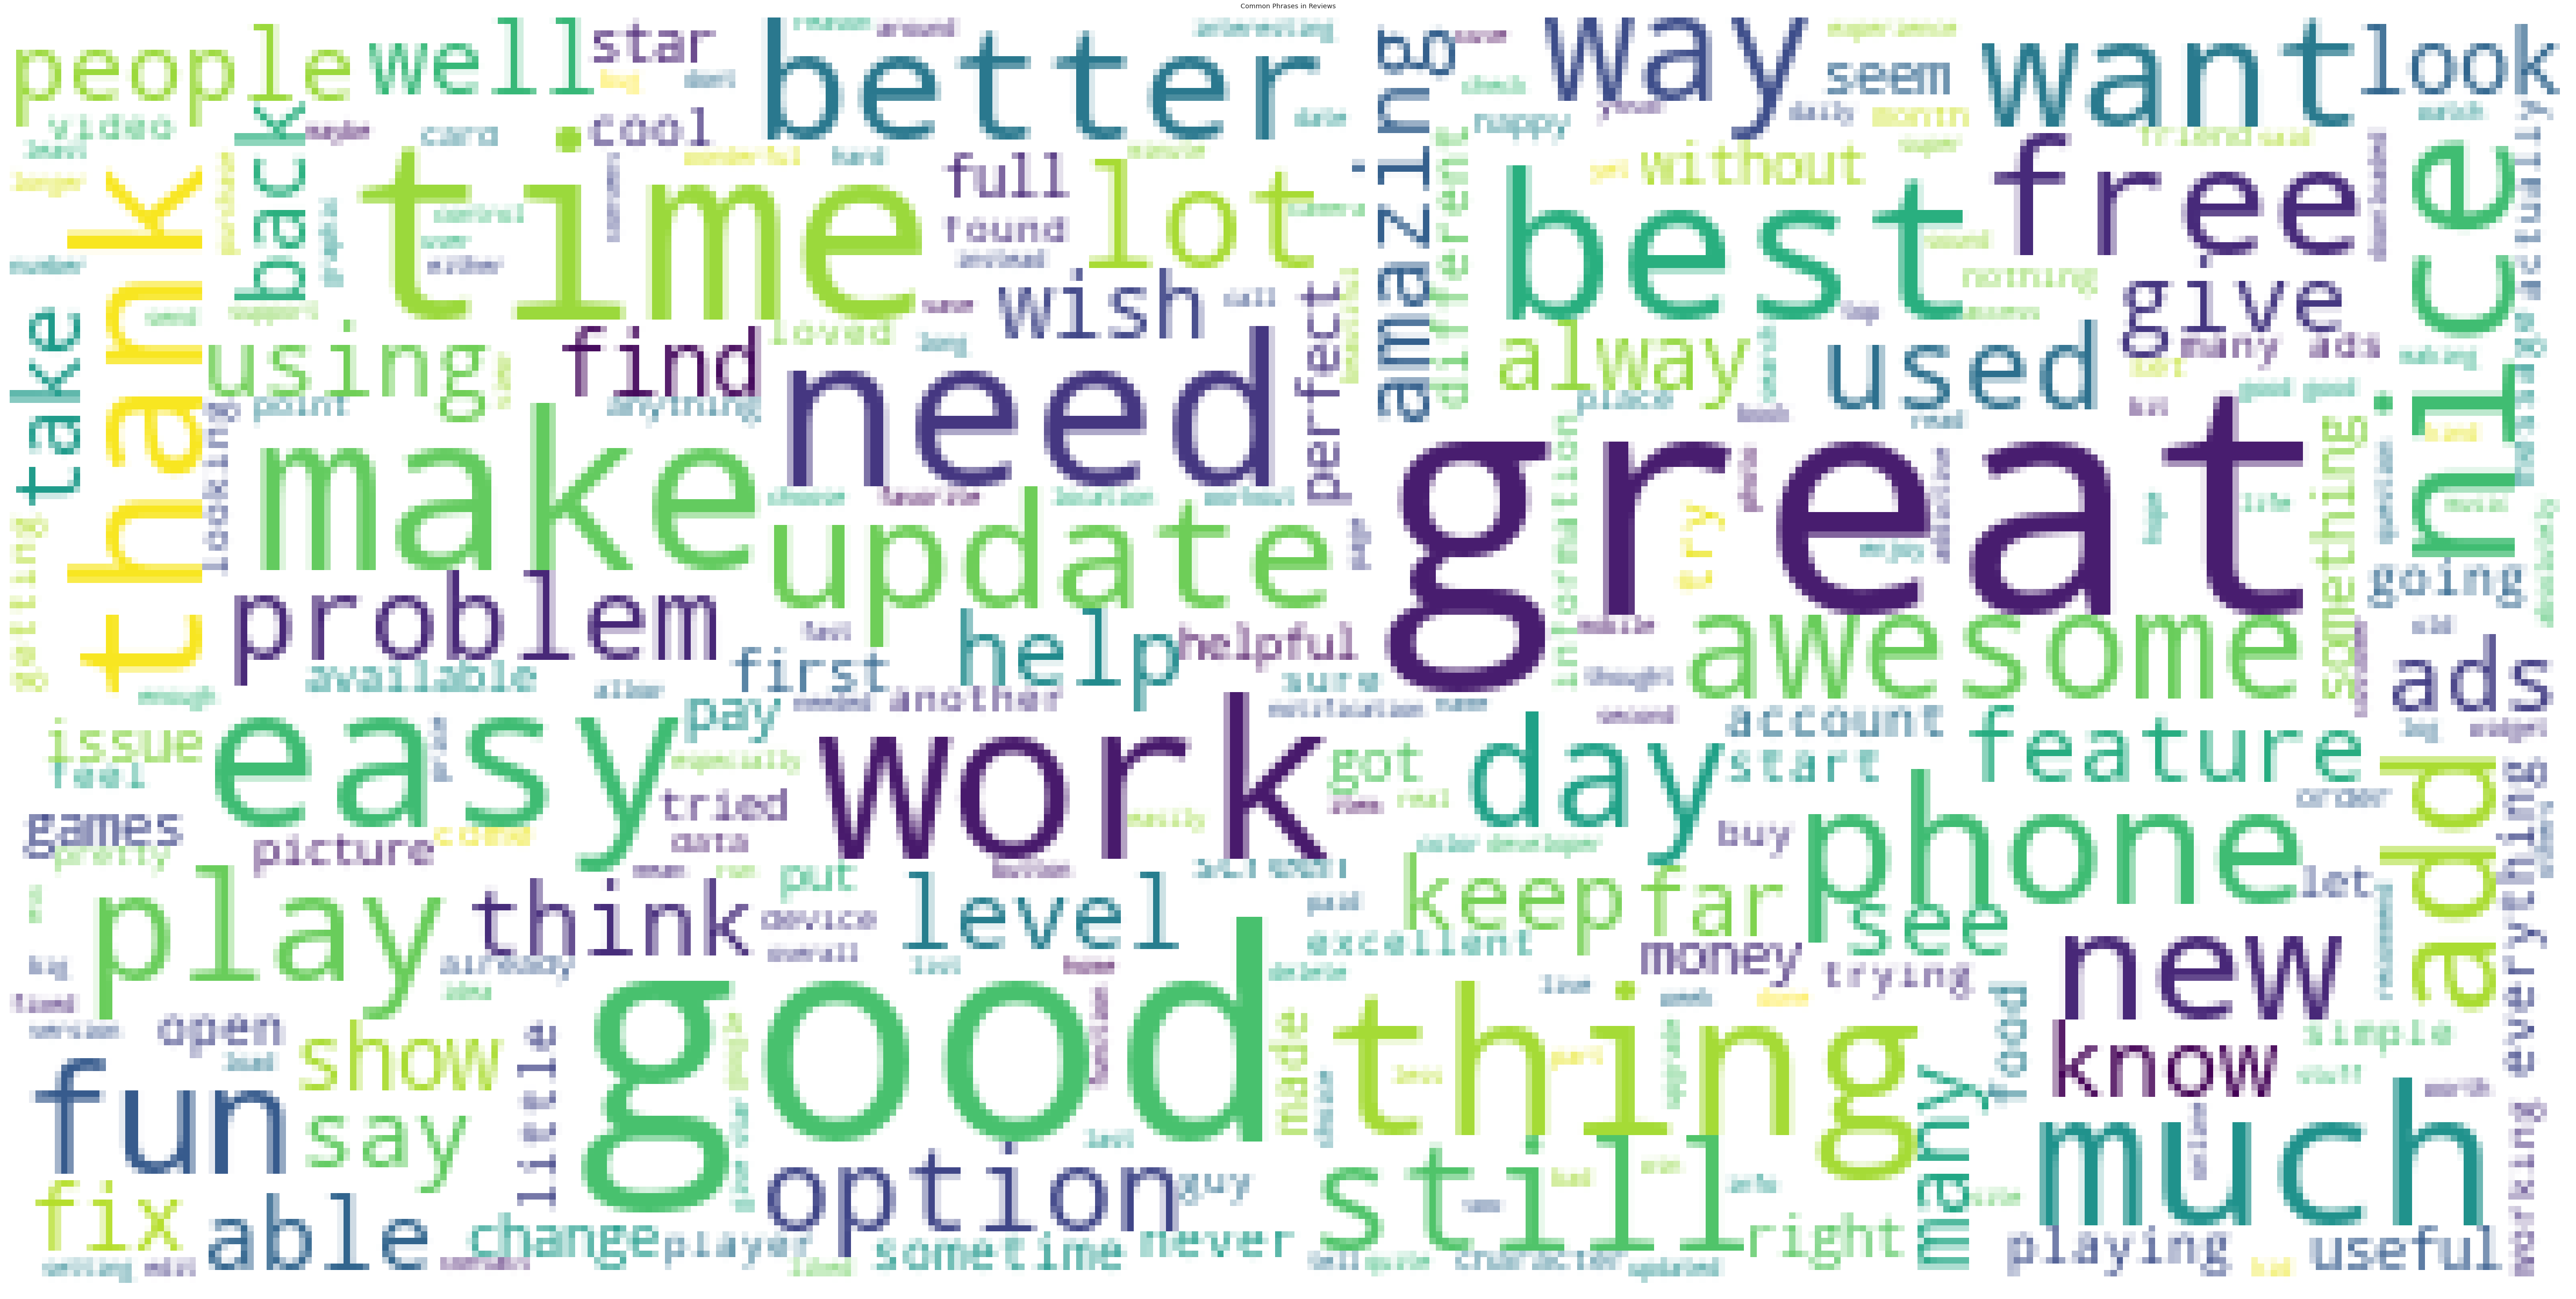

In [279]:
# Wordcloud of Positive Reviews
wc(pos_without_single_chr_rev,'white','Common Words' )